In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from statsmodels.tsa.ar_model import AR, ARResults

In [6]:
df = pd.read_csv('uspopulation.csv', index_col= 'DATE', parse_dates= True)

In [7]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


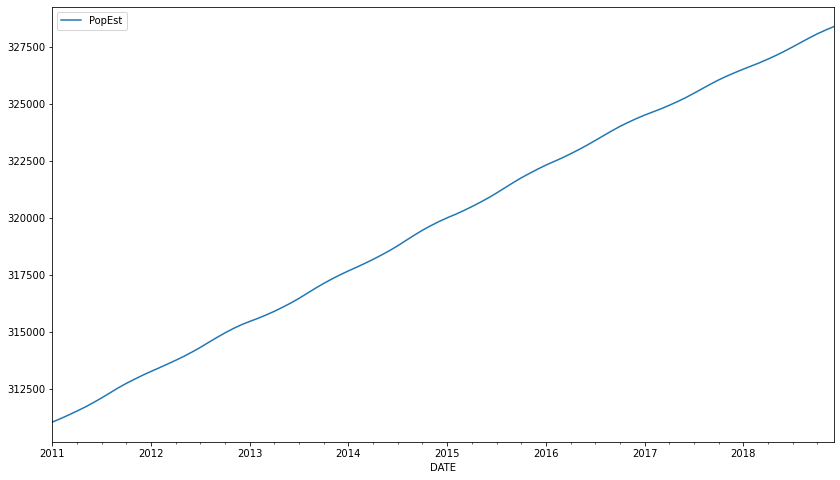

In [9]:
df.plot(figsize=(14,8))

In [10]:
df.shape

(96, 1)

In [14]:
df.isnull().sum()

PopEst    0
dtype: int64

In [11]:
train= df.iloc[:84]
test= df.iloc[84:]

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
AR1fit= AR(train['PopEst']).fit(maxlag= 1)

In [16]:
AR1fit.k_ar

1

In [17]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [19]:
predictions1 = AR1fit.predict(start= len(train), end= len(train) + len(test) - 1, dynamic= False )

In [20]:
predictions1 = predictions1.rename('AR(1) Predictions')

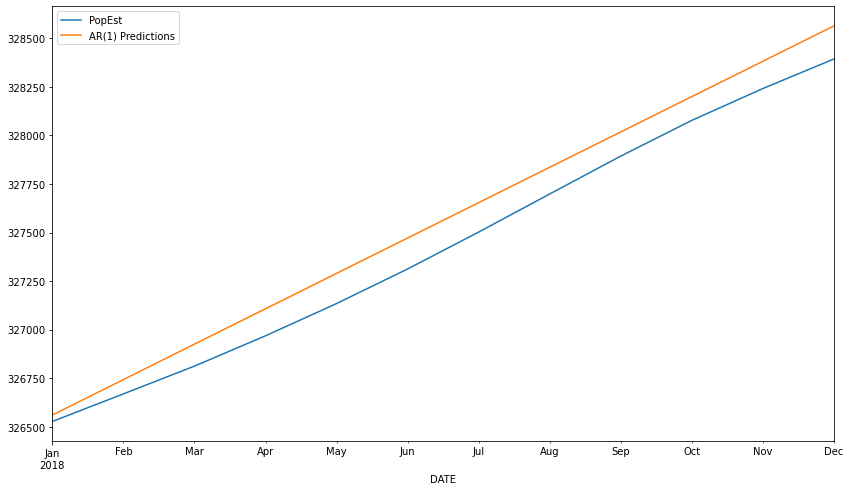

In [21]:
test.plot(legend= True, figsize= (14,8))
predictions1.plot(legend= True)

In [25]:
# for AR of the order 2.
AR2fit = AR(train['PopEst']).fit(maxlag= 2)

In [26]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [28]:
predictions2 = AR2fit.predict(start= len(train), end= len(train) + len(test) -1, dynamic= False)

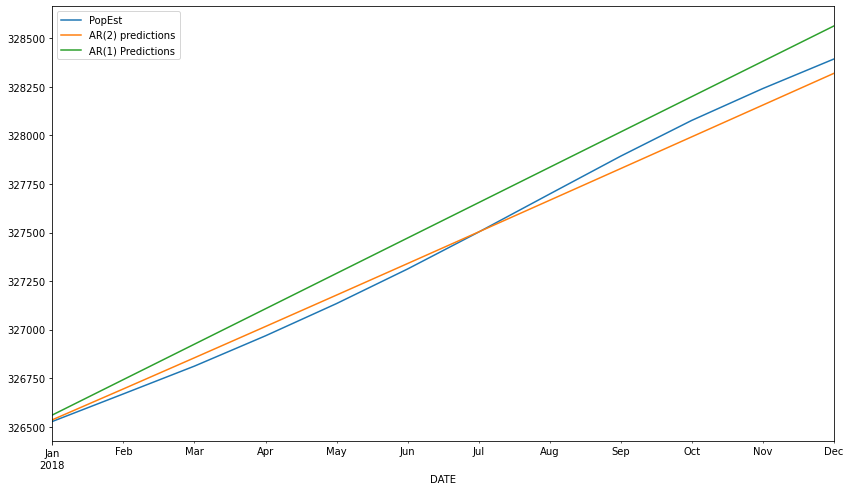

In [41]:
test.plot(legend = True, figsize= (14,8))
predictions2.plot(legend= True, label= 'AR(2) predictions')
predictions1.plot(legend= True)

In [31]:
# how to choose the correct value for the order of AR
# Let Statsmodels choose

ARfit= AR(train['PopEst']).fit(ic= 't-stat')

In [32]:
ARfit

In [33]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [34]:
# best max lags= 8

In [37]:
predictions8 = ARfit.predict(start= len(train), end= len(train) + len(test) -1, dynamic= False)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
labels= ['AR1', 'AR2', 'AR8']

In [38]:
preds = [predictions1, predictions2, predictions8]

In [39]:
for i in range(3):
    #np.sqrt
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714237833407
AR2 MSE was : 2713.258683668394
AR8 MSE was : 186.97263605698208


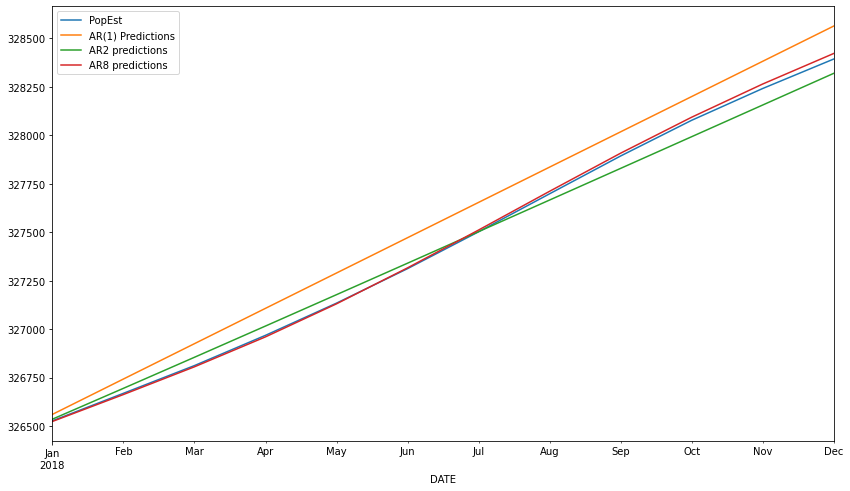

In [42]:
test.plot(legend = True, figsize=(14,8))
predictions1.plot(legend= True)
predictions2.plot(legend= True, label = 'AR2 predictions')
predictions8.plot(legend= True, label = 'AR8 predictions')

In [44]:
ARfit_aic = AR(train['PopEst']).fit(ic= 'aic')

In [45]:
predictions_aic= ARfit_aic.predict(start= len(train), end= 95, dynamic= False)

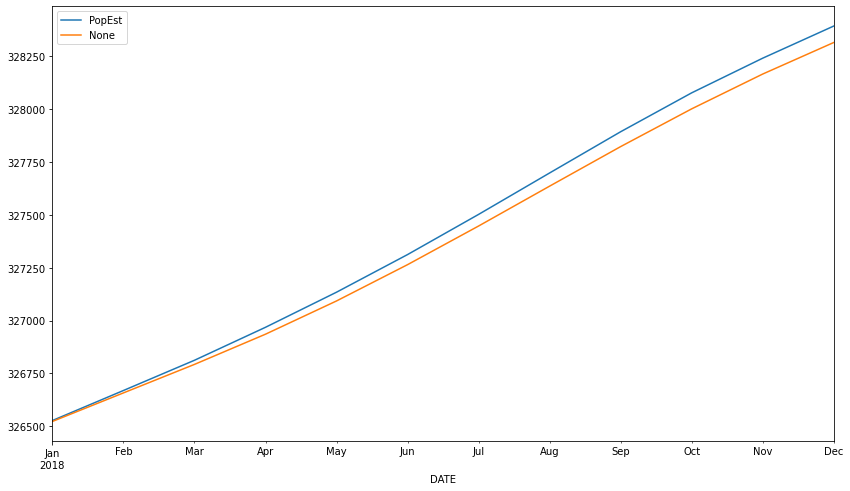

In [48]:
test.plot(legend= True, figsize= (14,8))
predictions_aic.plot(legend= True)

In [46]:
ARfit_aic = AR(train['PopEst']).fit(ic= 'bic')

In [47]:
predictions_bic= ARfit_aic.predict(start= len(train), end= 95, dynamic= False)

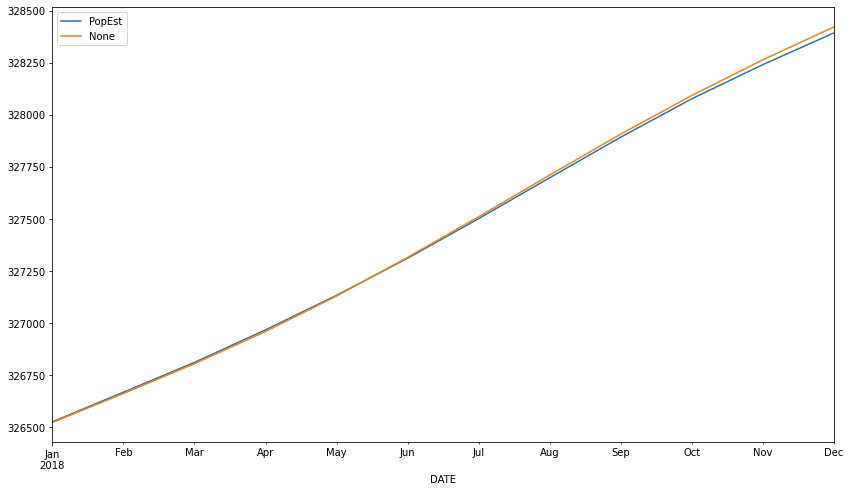

In [49]:
test.plot(legend= True, figsize= (14,8))
predictions_bic.plot(legend= True)

So, when AR is AR(8) and AR= bic, the model performs the best

In [43]:
# forecasting the population

model = AR(df['PopEst'])

In [50]:
ARfit= model.fit()

In [51]:
forecasted_values= ARfit.predict(start = len(df),  end = len(df) + 12).rename('Forecast')

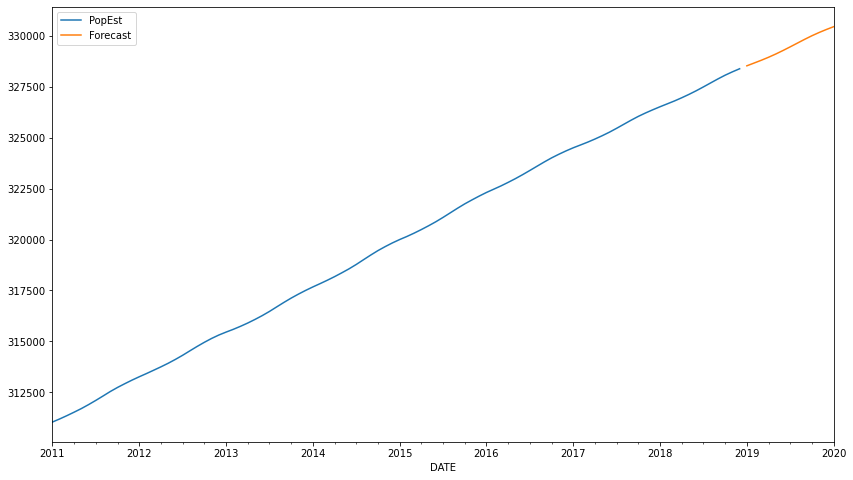

In [52]:
df['PopEst'].plot(figsize= (14,8), legend= True)
forecasted_values.plot(legend= True)

In [53]:
forecasted_values= ARfit.predict(start = len(df),  end = len(df) + 24).rename('Forecast')

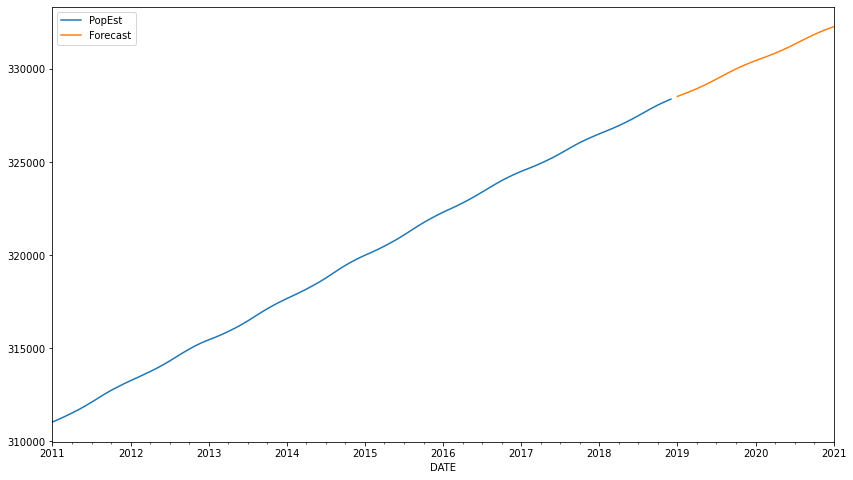

In [54]:
df['PopEst'].plot(figsize= (14,8), legend= True)
forecasted_values.plot(legend= True)